In [1]:
"""Librería para calculo numerico"""
import numpy as np
"""Libreria para graficas"""
import matplotlib.pyplot as plt
"""Importa para dividir el conjunto de datos en entrenamiento y prueba"""
from sklearn.model_selection import train_test_split
"""Librería que que ofrece metricas"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from keras.regularizers import l2
from keras.regularizers import l1
from tensorflow.keras.utils import to_categorical
"""Importa datos de señales de registro de archivos de ejecuciones
de simulación disponibles para la aplicación en tiempo real seleccionadas"""
import time
import math
import logging
"""Importar librerias para realizar CNN"""
import os
"""Cargar las imagenes"""
import cv2
from PIL import Image

In [2]:
"""Definición del tamaño, array de las imagenes"""
IMG_SHAPE  = 224
batch_size = 32
random_seed = 9

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
fpath = '/content/drive/MyDrive/Mineria/Vocales1BRG'
categories = os.listdir(fpath)
print("Lista de categorias = ",categories,"\n\nNo. de categorias = ", len(categories))

Lista de categorias =  ['u', 'o', 'i', 'a', 'e'] 

No. de categorias =  5


In [7]:
"""Funcion para cargar las imagenes por categorias"""
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SHAPE, IMG_SHAPE))
            img_array = Image.fromarray(img, 'RGB')

            img_lst.append(np.array(img_array))

            labels.append(index)
    return img_lst, labels
"""Cargar las imagenes desde las categorias"""
images, labels = load_images_and_labels(categories)
"""Mostrar la cantidad de imagenes cargadas"""
print("Nº de imágenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
print(type(images),type(labels))

Nº de imágenes cargadas =  1000 
No. de etiquetas cargadas =  1000
<class 'list'> <class 'list'>


In [8]:
"""Variables para ver el array de las imagenes y los label"""
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1000, 224, 224, 3) 
Labels shape =  (1000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


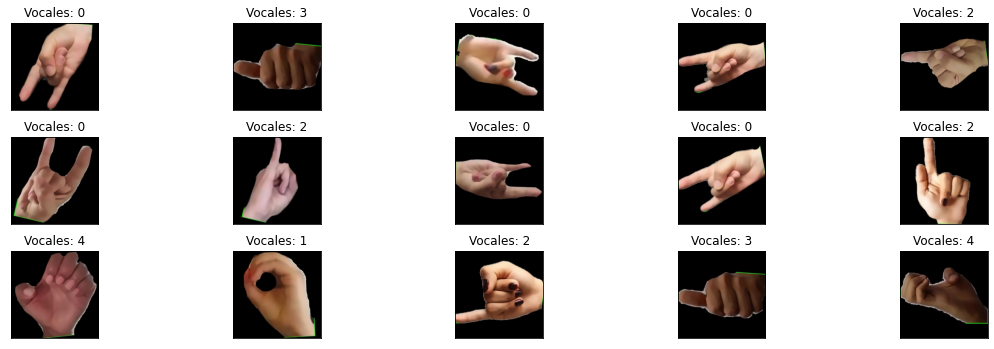

In [9]:
"""Función para visualizar imagenes aleatorias """
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(15):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(5 , 5 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        """Array de las vocales"""
        plt.title('Vocales: {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
"""Mostrar imagenes con sus labels"""
display_rand_images(images, labels)

## Shuffling

In [10]:
"""Primero se reorganizan los datos"""

"""Obtener números igualmente espaciados en un rango dado"""
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

"""Mezclar todos los valores igualmente espaciados en la lista 'n'"""
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In [11]:
"""El segundo paso es la mezcla de datos"""

"""imágenes aleatorias y datos de etiquetas correspondientes en ambas listas"""
images = images[n]
labels = labels[n]

print("Forma de las imágenes después de la mezcla = ",images.shape,"\nForma de las etiquetas después de mezclar= ",labels.shape)

Forma de las imágenes después de la mezcla =  (1000, 224, 224, 3) 
Forma de las etiquetas después de mezclar=  (1000,)


In [12]:
"""Normalizacion de los datos, segun su tipo: float, int"""
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Forma de las imágenes después de la normalización = ",images.shape)

Forma de las imágenes después de la normalización =  (1000, 224, 224, 3)


## División del conjunto de datos 

In [13]:
'''Se divide el conjunto de datos en 80% para entrenamiento y 20% para prueba'''
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

x_val = x_train[:58]
y_val = y_train[:58]
x_train = x_train[58:]
y_train = y_train[58:]

"""Mostrar los array en cada parte del entrenamiento y la prueba"""

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

x_train shape =  (742, 224, 224, 3)
y_train shape =  (742,)

x_test shape =  (200, 224, 224, 3)
y_test shape =  (200,)

x_val shape =  (58, 224, 224, 3)
y_val shape =  (58,)


In [14]:
"""Estructura One-hot-encode"""
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)
y_val = to_categorical(y_val, 5)

## Definición del modelo 

#### AlexNet se compone de cinco capas convolucionales y tres capas densas.

### Modelo 1

In [16]:
model_1=keras.models.Sequential([
    
    # Primera capa convolucional
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=x_train[0].shape), 
    keras.layers.BatchNormalization(), # Nos permite normalizar por lotes los datos, para evitar así que se tengan distancias muy diferentes.
    keras.layers.MaxPool2D(pool_size=(2,2)), # Nos permite reducir el tamaño
    
    # Segunda capa convolucional
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    # Tercera capa convolutional
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    # Cuarta capa convolutional
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    # Quinta capa convolutional
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    #Flatten nos ayuda a convertir los datos en un vector de características de 1D para ser utilizado por la siguiente capa que es la capa densa
    keras.layers.Flatten(),
    #  Las capas Dense son las capas que conectan cada neurona en una capa con todas las salidas de la capa anterior
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5), # Nos permite apagar un porcentaje de neuronas para que no se sobreajuste nuestro modelo
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    # Capa de salida
    keras.layers.Dense(5,activation='softmax')  
])

In [17]:
"""Configuracion para compilar el modelo, tambien se optimiza"""
model_1.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [18]:
"""Resumen del Modelo"""
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 128)       46592     
                                                                 
 batch_normalization_5 (Batc  (None, 54, 54, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [19]:
'''EarlyStopping para controlar el sobreentrenamiento'''
steps_per_epoch = (x_train.shape[0]//batch_size)
validation_steps = (x_val.shape[0] // batch_size)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [37]:
'''Entrenamos el modelo '''

history_model_1 = model_1.fit(x_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 50,
    validation_data=(x_val, y_val),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 41ms/step - loss: 0.0817 - acc: 0.9810 - val_loss: 0.5218 - val_acc: 0.9062
Epoch 2/50
23/23 [==============================] - 1s 34ms/step - loss: 0.3938 - acc: 0.9507 - val_loss: 0.4512 - val_acc: 0.8750
Epoch 3/50
23/23 [==============================] - 1s 34ms/step - loss: 0.1616 - acc: 0.9662 - val_loss: 0.9333 - val_acc: 0.8750
Epoch 4/50
23/23 [==============================] - 1s 34ms/step - loss: 0.1574 - acc: 0.9704 - val_loss: 0.3563 - val_acc: 0.9375
Epoch 5/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0649 - acc: 0.9789 - val_loss: 0.4519 - val_acc: 0.9375
Epoch 6/50
23/23 [==============================] - 1s 33ms/step - loss: 0.1301 - acc: 0.9789 - val_loss: 0.3148 - val_acc: 0.9688
Epoch 7/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0844 - acc: 0.9831 - val_loss: 0.2188 - val_acc: 0.9375
Epoch 8/50
23/23 [==============================] - 1s 34ms/step - loss: 0.1110 - a

In [38]:
'''Evaluamos el modelo'''
loss, accuracy = model_1.evaluate(x_test,y_test,batch_size=batch_size)
print('test_loss: %.2f' % (loss * 100.0))  
print('test_accuracy: %.2f' % (accuracy * 100.0))

7/7 [==============================] - 0s 17ms/step - loss: 0.2921 - acc: 0.9750
test_loss: 29.21
test_accuracy: 97.50


In [39]:
"""Función para las pruebas del modelo"""
model_probs = model_1.predict(x_test,batch_size=batch_size,verbose=0)
"""predecir clases nítidas para el conjunto de prueba"""
model_classes = np.argmax(model_probs,axis=1)
"""reducir a matriz 1d"""
model_probs = model_probs[:, 0]

y_test_reduced = np.argmax(y_test,axis=1)
 
"""Accuracy: (tp + tn) / (p + n)"""
accuracy = accuracy_score(y_test_reduced, model_classes)*100
"""Precision tp / (tp + fp)"""
precision = precision_score(y_test_reduced, model_classes, average='weighted')*100
"""Recall: tp / (tp + fn)"""
recall = recall_score(y_test_reduced, model_classes, average='weighted')*100
"""F1: 2 tp / (2 tp + fp + fn)"""
f1 = f1_score(y_test_reduced, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

logging.info('Accuracy: %.2f' % accuracy)
logging.info('F1 score: %.2f' % f1)
logging.info('Precision: %.2f' % precision)
logging.info('Recall: %.2f' % recall)

Accuracy: 97.50
F1 score: 97.50
Precision: 97.52
Recall: 97.50


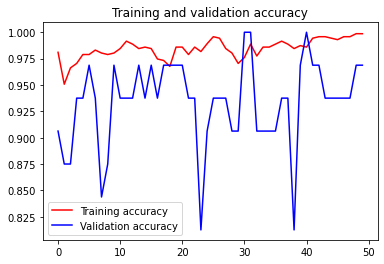

In [40]:
"""Funciones para graficar los history de validacion y el accuracy"""
accuracy = history_model_1.history['acc']
validation_accuracy = history_model_1.history['val_acc']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig("Training and validation accuracy")
plt.show()

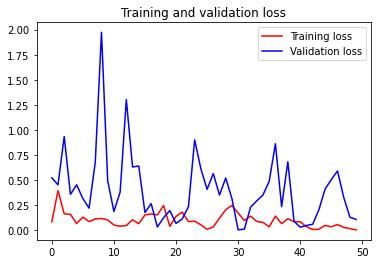

<Figure size 432x288 with 0 Axes>

In [41]:
'''Loss '''
accuracy = history_model_1.history['loss']
validation_accuracy = history_model_1.history['val_loss']
epochs = range(len(accuracy))
'''Primera linea ejecutada en la que se muestran el history del entrenamiento de la loss'''
plt.plot(epochs, accuracy, 'r', label='Training loss')
'''Segunda linea ejecutada en la que se muestran el history del validacion de la loss'''
plt.plot(epochs, validation_accuracy, 'b', label='Validation loss')
'''Titulo de la grafica'''
plt.title('Training and validation loss')
'''colocar leyenda en los ejes'''
plt.legend(loc=0)
plt.figure()
'''Ejecucion de la grafica'''
plt.show()

In [42]:
"""Predicción del Modelo"""
y_pred = model_1.predict(x_test)

In [43]:
"""Mostrar el array del y_pred"""
y_pred.round()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0.

In [44]:
'''Puntuación del accuracy'''
accuracy_score(y_test, y_pred.round())*100

97.0

In [45]:
'''Definimos las variables Y_pred_classes & Y_true'''
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

In [46]:
"""Reporte de clasificación de las métricas"""
report = classification_report(Y_true, Y_pred_classes, target_names=categories)
print(report)

              precision    recall  f1-score   support

           u       1.00      0.97      0.99        39
           o       0.97      0.95      0.96        40
           i       0.98      1.00      0.99        45
           a       0.96      0.98      0.97        46
           e       0.97      0.97      0.97        30

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [47]:
"""Estructurar la matriz de confusion"""
confusion = confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[38  1  0  0  0]
 [ 0 38  0  2  0]
 [ 0  0 45  0  0]
 [ 0  0  0 45  1]
 [ 0  0  1  0 29]]


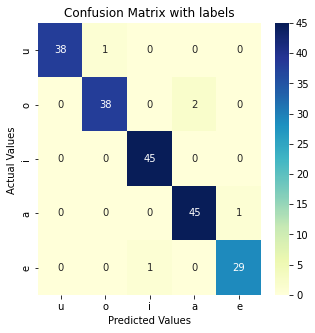

In [48]:
"""Librería para graficar la matriz de confusion"""
import seaborn as sns
plt.figure(figsize=(5, 5))

ma = sns.heatmap(confusion, cmap="YlGnBu", annot=True)
ma.set_title('Confusion Matrix with labels')
ma.set_xlabel('Predicted Values')
ma.set_ylabel('Actual Values ')
ma.xaxis.set_ticklabels(categories)
ma.yaxis.set_ticklabels(categories)

plt.show()

### Modelo 2

#### Regularización L2
Reduce el valor de los parámetros para que sean pequeños.


kernel_regularizer: Restringe los parámetros del kernel haciendolos que sean pequeños.

bias_regularizer: Aplica una penalización solo al bias de la capa.

Un sesgo alto hace que la neurona requiera una entrada más alta para generar una salida de 1. Un sesgo bajo lo hace más fácil.


In [50]:
model_2=keras.models.Sequential([
    
    # Primera capa convolucional
    keras.layers.Conv2D(filters=128, kernel_size=(11,11),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) , strides=(4,4), activation='relu', input_shape=(x_train[0].shape)), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    # Segunda capa convolucional
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    # Tercera capa convolutional
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    # Cuarta capa convolutional
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    # Quinta capa convolutional
    keras.layers.Conv2D(filters=256, kernel_size=(1,1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    #Flatten nos ayuda a convertir los datos en un vector de características de 1D para ser utilizado por la siguiente capa que es la capa densa
    keras.layers.Flatten(),
    #  Las capas Dense son las capas que conectan cada neurona en una capa con todas las salidas de la capa anterior
    keras.layers.Dense(1024,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'), # Nos permite apagar un porcentaje de neuronas para que no se sobreajuste nuestro modelo
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='softmax')  
])

In [51]:
"""Configuracion para compilar el modelo, tambien se optimiza"""
model_2.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [52]:
"""Resumen del Modelo"""
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 54, 54, 128)       46592     
                                                                 
 batch_normalization_15 (Bat  (None, 54, 54, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_16 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

In [66]:
'''Entrenamos el modelo '''
history_model_2 = model_2.fit(x_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 50,
    validation_data=(x_val, y_val),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 43ms/step - loss: 1.3766 - acc: 0.9620 - val_loss: 1.5013 - val_acc: 0.9062
Epoch 2/50
23/23 [==============================] - 1s 36ms/step - loss: 1.1268 - acc: 0.9690 - val_loss: 2.4795 - val_acc: 0.5312
Epoch 3/50
23/23 [==============================] - 1s 36ms/step - loss: 0.9900 - acc: 0.9620 - val_loss: 3.7532 - val_acc: 0.2812
Epoch 4/50
23/23 [==============================] - 1s 35ms/step - loss: 0.9053 - acc: 0.9648 - val_loss: 2.9544 - val_acc: 0.3125
Epoch 5/50
23/23 [==============================] - 1s 35ms/step - loss: 1.0925 - acc: 0.9423 - val_loss: 1.6255 - val_acc: 0.7812
Epoch 6/50
23/23 [==============================] - 1s 35ms/step - loss: 1.2469 - acc: 0.9338 - val_loss: 1.8775 - val_acc: 0.7188
Epoch 7/50
23/23 [==============================] - 1s 35ms/step - loss: 1.2638 - acc: 0.9437 - val_loss: 1.4838 - val_acc: 0.8438
Epoch 8/50
23/23 [==============================] - 1s 35ms/step - loss: 1.1682 - a

In [67]:
'''Evaluamos el modelo'''
loss, accuracy = model_2.evaluate(x_test,y_test,batch_size=batch_size)
print('test_loss: %.2f' % (loss * 100.0))  
print('test_accuracy: %.2f' % (accuracy * 100.0))

7/7 [==============================] - 0s 19ms/step - loss: 1.5164 - acc: 0.7650
test_loss: 151.64
test_accuracy: 76.50


In [68]:
"""Función para las pruebas del modelo"""
model_probs = model_2.predict(x_test,batch_size=batch_size,verbose=0)
"""predecir clases nítidas para el conjunto de prueba"""
model_classes = np.argmax(model_probs,axis=1)
"""reducir a matriz 1d"""
model_probs = model_probs[:, 0]

y_test_reduced = np.argmax(y_test,axis=1)
 
"""Accuracy: (tp + tn) / (p + n)"""
accuracy = accuracy_score(y_test_reduced, model_classes)*100
"""Precision tp / (tp + fp)"""
precision = precision_score(y_test_reduced, model_classes, average='weighted')*100
"""Recall: tp / (tp + fn)"""
recall = recall_score(y_test_reduced, model_classes, average='weighted')*100
"""F1: 2 tp / (2 tp + fp + fn)"""
f1 = f1_score(y_test_reduced, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

logging.info('Accuracy: %.2f' % accuracy)
logging.info('F1 score: %.2f' % f1)
logging.info('Precision: %.2f' % precision)
logging.info('Recall: %.2f' % recall)

Accuracy: 76.50
F1 score: 76.59
Precision: 80.30
Recall: 76.50


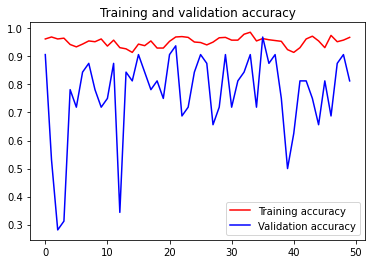

In [69]:
"""Funciones para graficar los history de validacion y el accuracy"""
accuracy = history_model_2.history['acc']
validation_accuracy = history_model_2.history['val_acc']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig("Training and validation accuracy")
plt.show()

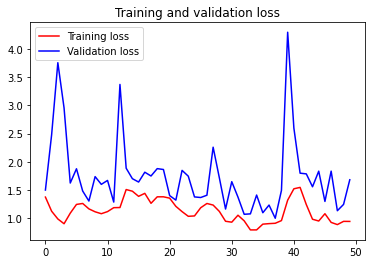

<Figure size 432x288 with 0 Axes>

In [70]:
'''Loss '''
accuracy = history_model_2.history['loss']
validation_accuracy = history_model_2.history['val_loss']
epochs = range(len(accuracy))
'''Primera linea ejecutada en la que se muestran el history del entrenamiento de la loss'''
plt.plot(epochs, accuracy, 'r', label='Training loss')
'''Segunda linea ejecutada en la que se muestran el history del validacion de la loss'''
plt.plot(epochs, validation_accuracy, 'b', label='Validation loss')
'''Titulo de la grafica'''
plt.title('Training and validation loss')
'''colocar leyenda en los ejes'''
plt.legend(loc=0)
plt.figure()
'''Ejecucion de la grafica'''
plt.show()

In [71]:
"""Predicción del Modelo"""
y_pred = model_2.predict(x_test)

In [72]:
"""Mostrar el array del y_pred"""
y_pred.round()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0.

In [73]:
'''Puntuación del accuracy'''
accuracy_score(y_test, y_pred.round())*100

75.5

In [74]:
'''Definimos las variables Y_pred_classes & Y_true'''
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

In [75]:
'''Realizaos el reporte de clasificación que obtuno nuestor modelo de acuerdo a cada vocal'''
report = classification_report(Y_true, Y_pred_classes, target_names=categories)
print(report)

              precision    recall  f1-score   support

           u       0.95      0.51      0.67        39
           o       0.90      0.90      0.90        40
           i       0.73      0.78      0.75        45
           a       0.84      0.80      0.82        46
           e       0.53      0.83      0.65        30

    accuracy                           0.77       200
   macro avg       0.79      0.77      0.76       200
weighted avg       0.80      0.77      0.77       200



In [76]:
'''Matriz de cunfusión'''
confusion_model2 = confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[38  1  0  0  0]
 [ 0 38  0  2  0]
 [ 0  0 45  0  0]
 [ 0  0  0 45  1]
 [ 0  0  1  0 29]]


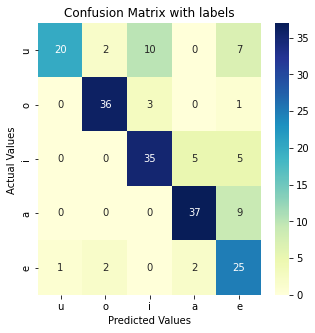

In [77]:
'''Gráfica de la matriz de confusión'''
plt.figure(figsize=(5, 5))
ma = sns.heatmap(confusion_model2, cmap="YlGnBu", annot=True)
ma.set_title('Confusion Matrix with labels')
ma.set_xlabel('Predicted Values')
ma.set_ylabel('Actual Values ')
ma.xaxis.set_ticklabels(categories)
ma.yaxis.set_ticklabels(categories)

plt.show()

In [79]:
model_json = model_1.to_json()
with open("AlexNet_Vocales_Classifier.json", "w") as json_file:
    json_file.write(model_json)
model_1.save("AlexNet_Vocales_Classifier.h5")
print("Saved model to disk")
model_1.save_weights("AlexNet_Vocales.h5")

Saved model to disk


In [80]:
model_json = model_2.to_json()
with open("AlexNet_L1L2_Vocales_Classifier.json", "w") as json_file:
    json_file.write(model_json)
model_2.save("AlexNet_L1L2_Vocales_Classifier.h5")
print("Saved model to disk")
model_2.save_weights("AlexNet_L1L2_Vocales.h5")

Saved model to disk
